In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
carros = pd.read_csv("../datasets/cars/cars_dataset_numbers.csv")
carros.head()

,carId,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,Popularity,...,Crossover,Exotic,Factory Tuner,Hatchback,High-Performance,Hybrid,Luxury,Performance,City Preference,Highway Preference
0,0,0,335,6,1,2,2,1,4,3916,...,0,0,1,0,1,0,1,0,0,1
1,1,0,300,6,1,2,2,1,5,3916,...,0,0,0,0,0,0,1,1,0,1
2,2,0,300,6,1,2,2,1,4,3916,...,0,0,0,0,1,0,1,0,0,1


In [3]:
# Selecionar apenas as colunas numéricas relevantes
colunas_usadas = [
    "Engine Fuel Type",
    "Engine HP",
    "Engine Cylinders",
    "Transmission Type",
    "Driven_Wheels",
    "Number of Doors",
    "Vehicle Size",
    "Vehicle Style",
    "Popularity",
    "MSRP",
    "Common",
    "Crossover",
    "Exotic",
    "Factory Tuner",
    "Hatchback",
    "High-Performance",
    "Hybrid",
    "Luxury",
    "Performance",
    "City Preference",
    "Highway Preference",
]
numeric_data = carros[colunas_usadas]

In [4]:
# Normalizar os dados
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_data)

In [5]:
print(normalized_data)

[[-0.33491187  0.53186082  0.25772947 ... -0.50216495 -0.75108158
   0.75108158]
 [-0.33491187  0.22579192  0.25772947 ...  1.99137752 -0.75108158
   0.75108158]
 [-0.33491187  0.22579192  0.25772947 ... -0.50216495 -0.75108158
   0.75108158]
 ...
 [-0.33491187  0.22579192  0.25772947 ... -0.50216495 -0.75108158
   0.75108158]
 [-0.33491187  0.22579192  0.25772947 ... -0.50216495 -0.75108158
   0.75108158]
 [-0.33491187  0.22579192  0.25772947 ... -0.50216495 -0.75108158
   0.75108158]]


In [6]:
# Calcular a similaridade de cossenos
cosine_sim = cosine_similarity(normalized_data, normalized_data)

In [7]:
print(cosine_sim)

[[ 1.          0.43722862  0.70671297 ... -0.1092389  -0.10906789
  -0.10907801]
 [ 0.43722862  1.          0.63840057 ... -0.08759469 -0.08675936
  -0.0868021 ]
 [ 0.70671297  0.63840057  1.         ... -0.09695394 -0.09568515
  -0.09574952]
 ...
 [-0.1092389  -0.08759469 -0.09695394 ...  1.          0.99968238
   0.99971311]
 [-0.10906789 -0.08675936 -0.09568515 ...  0.99968238  1.
   0.99999922]
 [-0.10907801 -0.0868021  -0.09574952 ...  0.99971311  0.99999922
   1.        ]]


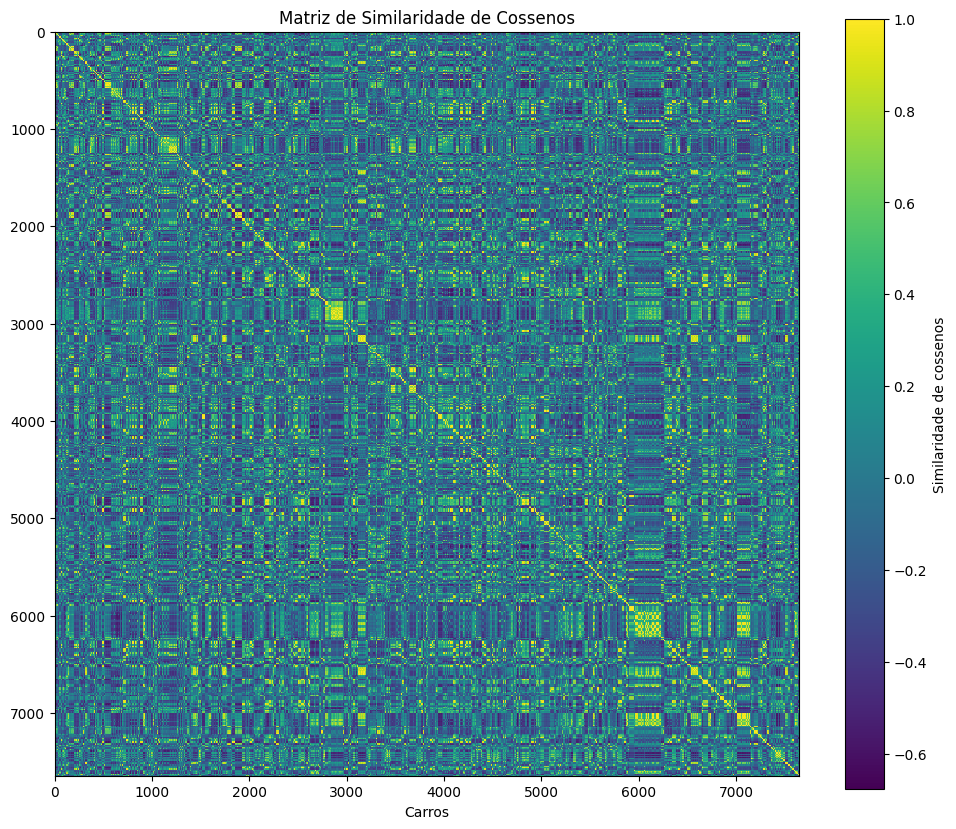

In [8]:
# visualização
plt.figure(figsize=(12, 10))
plt.imshow(cosine_sim, cmap="viridis", interpolation="nearest")
plt.colorbar(label="Similaridade de cossenos")
plt.title("Matriz de Similaridade de Cossenos")
plt.xlabel("Carros")
plt.show()

In [9]:
carros_full = pd.read_csv("../datasets/cars/cars_dataset.csv")
carros_full

,carId,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,...,Common,Crossover,Exotic,Factory Tuner,Hatchback,High-Performance,Hybrid,Luxury,Performance,Vehicle_Title_Partial
0,0,BMW,1 Series M,2011,gasoline,335,6,MANUAL,RWD,2,...,False,False,False,True,False,True,False,True,False,2011 BMW 1 Series M Coupe
1,1,BMW,1 Series,2011,gasoline,300,6,MANUAL,RWD,2,...,False,False,False,False,False,False,False,True,True,2011 BMW 1 Series Convertible
2,2,BMW,1 Series,2011,gasoline,300,6,MANUAL,RWD,2,...,False,False,False,False,False,True,False,True,False,2011 BMW 1 Series Coupe
3,3,BMW,1 Series,2011,gasoline,230,6,MANUAL,RWD,2,...,False,False,False,False,False,False,False,True,True,2011 BMW 1 Series Coupe
4,4,BMW,1 Series,2011,gasoline,230,6,MANUAL,RWD,2,...,False,False,False,False,False,False,False,True,False,2011 BMW 1 Series Convertible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,7642,Acura,ZDX,2011,gasoline,300,6,AUTOMATIC,AWD,4,...,False,True,False,False,True,False,False,True,False,2011 Acura ZDX Hatchback
7643,7643,Acura,ZDX,2012,gasoline,300,6,AUTOMATIC,AWD,4,...,False,True,False,False,True,False,False,True,False,2012 Acura ZDX Hatchback
7644,7644,Acura,ZDX,2012,gasoline,300,6,AUTOMATIC,AWD,4,...,False,True,False,False,True,False,False,True,False,2012 Acura ZDX Hatchback
7645,7645,Acura,ZDX,2012,gasoline,300,6,AUTOMATIC,AWD,4,...,False,True,False,False,True,False,False,True,False,2012 Acura ZDX Hatchback


In [10]:
n_recomendacoes = 5
sim_scores = list(enumerate(cosine_sim[7]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1 : (n_recomendacoes + 1)]
sim_scores

[(10, 0.9999992380353725),
 (2, 0.999926409248712),
 (16, 0.9990784473749347),
 (15, 0.9928259648217976),
 (7632, 0.991588883535688)]

In [11]:
carros_similares = [i[0] for i in sim_scores]
carros_similares

[10, 2, 16, 15, 7632]

In [12]:
carros_full.iloc[carros_similares]

,carId,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,...,Common,Crossover,Exotic,Factory Tuner,Hatchback,High-Performance,Hybrid,Luxury,Performance,Vehicle_Title_Partial
10,10,BMW,1 Series,2013,gasoline,300,6,MANUAL,RWD,2,...,False,False,False,False,False,True,False,True,False,2013 BMW 1 Series Coupe
2,2,BMW,1 Series,2011,gasoline,300,6,MANUAL,RWD,2,...,False,False,False,False,False,True,False,True,False,2011 BMW 1 Series Coupe
16,16,BMW,1 Series,2013,gasoline,320,6,MANUAL,RWD,2,...,False,False,False,False,False,True,False,True,False,2013 BMW 1 Series Coupe
15,15,BMW,1 Series,2013,gasoline,320,6,MANUAL,RWD,2,...,False,False,False,False,False,True,False,True,False,2013 BMW 1 Series Convertible
7632,7632,BMW,Z4,2014,gasoline,300,6,MANUAL,RWD,2,...,False,False,False,False,False,True,False,True,False,2014 BMW Z4 Convertible


In [13]:
def get_content_based_recomendacao(car_id, n_recomendacoes=5):
    idx = car_id
    sim_nota = list(enumerate(cosine_sim[idx]))
    sim_nota = sorted(sim_nota, key=lambda x: x[1], reverse=True)
    sim_nota = sim_nota[1 : (n_recomendacoes + 1)]
    carros_similares = [i[0] for i in sim_nota]
    carros_similares = carros_full.iloc[carros_similares]
    return carros_similares


carro_exemplo = carros_full.iloc[5]
carros_similares = get_content_based_recomendacao(
    carro_exemplo["carId"], n_recomendacoes=10
)
nome_carro_exemplo = carro_exemplo["Vehicle_Title_Partial"]
nomes_carros_similares = carros_similares["Vehicle_Title_Partial"]
print(
    f"Porque você gostou do carro {nome_carro_exemplo} achamos que você possa gostar de:"
)
print(nomes_carros_similares)

Porque você gostou do carro 2012 BMW 1 Series Coupe achamos que você possa gostar de:
11           2013 BMW 1 Series Coupe
14           2013 BMW 1 Series Coupe
3            2011 BMW 1 Series Coupe
1      2011 BMW 1 Series Convertible
6      2012 BMW 1 Series Convertible
12     2013 BMW 1 Series Convertible
262          2015 BMW 4 Series Coupe
280          2016 BMW 4 Series Coupe
270    2015 BMW 4 Series Convertible
281    2016 BMW 4 Series Convertible
Name: Vehicle_Title_Partial, dtype: object
